# Import libraries

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# theme beutify
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Load dataset & initial analysis

In [459]:
data = pd.read_csv("../GoodDataForTrain/inputFile.csv")

In [352]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


- data consists of ? values
- replace ? by Null

In [353]:
# replacing ? with np.null
data = data.replace(to_replace='?', value=np.NaN)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Few catagorical features contains null values, need to handle missing values
- Features are mix of numerical & catagrical

In [186]:
num_data = data.select_dtypes(exclude='O')
cat_data = data.select_dtypes(include='O')

# Pre-processing

## working out for cat data

### Initial Cat check

In [187]:
cat_data.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,10/17/2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,1/25/2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,6/27/2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,1/21/2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,9/6/2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2/22/2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,5/25/1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,1/10/2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,6/6/2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2/17/2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [188]:
# check unique values
cat_data.nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

- catagorical data with unique values close to total records can be dropped

In [189]:
# drop features with high unique values
cat_data = cat_data.drop(['policy_bind_date','incident_location'],axis=1)

In [190]:
cat_data.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,1/21/2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,NaN,NaN,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NaN,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2/17/2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [191]:
cat_data.describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2/2/2015,28
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,822,3,Rear Collision,292


### check for Ordinal & Nominal cat features

In [192]:
# getting unique values for each cat features
for col in cat_data.columns:
    print(f"{col}\n{cat_data[col].unique()}")

policy_state
['OH' 'IN' 'IL']
policy_csl
['250/500' '100/300' '500/1000']
insured_sex
['MALE' 'FEMALE']
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_date
['1/25/2015' '1/21/2015' '2/22/2015' '1/10/2015' '2/17/2015' '1/2/2015'
 '1/13/2015' '2/27/2015' '1/30/2015' '1/5/2015' '1/6/2015' '2/15/2015'
 '1/22/2015' '1/8/2015' '1/15/2015' '1/29/2015' '1/19/

- policy_csl,insured_education_level,incident_severity can be considered as ordinal
-incident_date, need to have applicaion date to get days old incident, which could have been more relevent, as we do not have claim application date, we will drop incident_date

In [348]:
# Mapping ordinal cat features
cat_data['policy_csl'] = cat_data['policy_csl'].map({'100/300' : 1, '250/500' : 2 ,'500/1000':3})
cat_data['insured_education_level'] = cat_data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters,Associate':5,'MD':6,'PhD':7})
cat_data['incident_severity'] = cat_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})

In [194]:
cat_data = cat_data.drop(['incident_date'],axis=1)

In [164]:
cat_data.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,2,MALE,6.0,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,3,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,2,MALE,6.0,machine-op-inspct,reading,other-relative,Vehicle Theft,NaN,2,Police,VA,Riverwood,NaN,NaN,Mercedes,E400,Y
2,OH,1,FEMALE,7.0,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,2,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,2,FEMALE,7.0,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,3,Police,OH,Arlington,NaN,NO,Chevrolet,Tahoe,Y
4,IL,3,MALE,NaN,sales,board-games,unmarried,Vehicle Theft,NaN,2,None,NY,Arlington,NO,NO,Accura,RSX,N


In [195]:
# imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cat_data_impute =pd.DataFrame(imputer.fit_transform(cat_data), columns=cat_data.columns)
cat_data_impute.isna().sum()

policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type             0
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage            0
police_report_available    0
auto_make                  0
auto_model                 0
fraud_reported             0
dtype: int64

In [196]:
cat_data_impute.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,2,MALE,6.0,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,3,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,2,MALE,6.0,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,2,Police,VA,Riverwood,NO,NO,Mercedes,E400,Y
2,OH,1,FEMALE,7.0,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,2,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,2,FEMALE,7.0,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,3,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,Y
4,IL,3,MALE,1.0,sales,board-games,unmarried,Vehicle Theft,Rear Collision,2,None,NY,Arlington,NO,NO,Accura,RSX,N


### Target variable mapping

In [197]:
y = cat_data_impute['fraud_reported']
y = y.map({'Y':1,'N':0})
cat_data_impute = cat_data_impute.drop(['fraud_reported'],axis=1)

In [198]:
cat_data_impute.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,OH,2,MALE,6.0,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,3,Police,SC,Columbus,YES,YES,Saab,92x
1,IN,2,MALE,6.0,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,2,Police,VA,Riverwood,NO,NO,Mercedes,E400
2,OH,1,FEMALE,7.0,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,2,Police,NY,Columbus,NO,NO,Dodge,RAM
3,IL,2,FEMALE,7.0,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,3,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe
4,IL,3,MALE,1.0,sales,board-games,unmarried,Vehicle Theft,Rear Collision,2,None,NY,Arlington,NO,NO,Accura,RSX


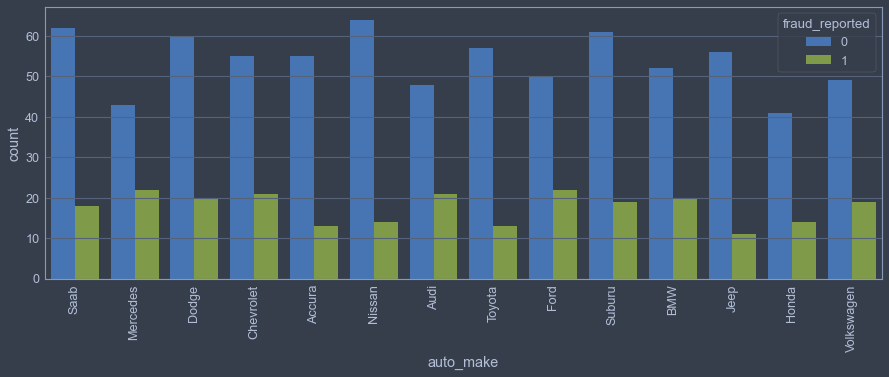

In [219]:
# as auto_mode has high cardinality, check its relation with target varibale
plt.figure(figsize=(15,5))
sns.countplot(data=cat_data_impute, x='auto_make', hue=y, )
plt.xticks(rotation=90)
plt.plot(y=y[])
plt.show()

- auto_make do not show much impact on fraud claims detection, as fraud claims are fairly uniformaly distributed for each auto make

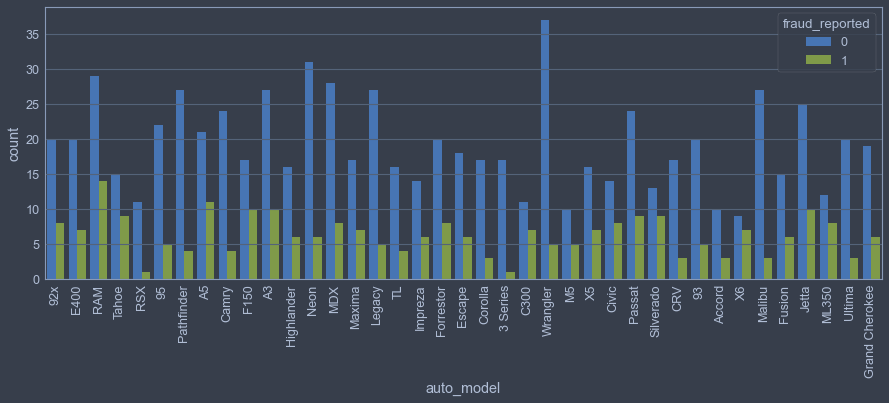

In [218]:
# as auto_mode has high cardinality, check its relation with target varibale
plt.figure(figsize=(15,5))
sns.countplot(data=cat_data_impute, x='auto_model', hue=y, )
plt.xticks(rotation=90)
plt.show()

- difficult to judge relation, need to check with chi2 test

### Encoding of cat varibales

In [246]:
# change dtype for mapped variables
cat_data_impute['policy_csl'] = cat_data_impute['policy_csl'].astype('int8') 
cat_data_impute['insured_education_level'] = cat_data_impute['insured_education_level'].astype('int8') 
cat_data_impute['incident_severity'] = cat_data_impute['incident_severity'].astype('int8') 
cat_data_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   policy_state             1000 non-null   object
 1   policy_csl               1000 non-null   int8  
 2   insured_sex              1000 non-null   object
 3   insured_education_level  1000 non-null   int8  
 4   insured_occupation       1000 non-null   object
 5   insured_hobbies          1000 non-null   object
 6   insured_relationship     1000 non-null   object
 7   incident_type            1000 non-null   object
 8   collision_type           1000 non-null   object
 9   incident_severity        1000 non-null   int8  
 10  authorities_contacted    1000 non-null   object
 11  incident_state           1000 non-null   object
 12  incident_city            1000 non-null   object
 13  property_damage          1000 non-null   object
 14  police_report_available  1000 non-null   

In [252]:
catEncoded = pd.get_dummies(cat_data_impute,drop_first=True)
catEncoded.head()

,policy_csl,insured_education_level,incident_severity,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,2,6,3,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,7,2,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,7,3,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,1,2,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


- cat data are ready fo training

In [254]:
dataFinal = pd.concat([num_data,catEncoded],axis=1)
dataFinal.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,0,1,0,0,0,0,0,0,0,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,0,0,0,0,1,0,0,0,0
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,0,0,1,0,0,0,0,0,0,0


# Model training

In [279]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_val, y_train, y_val = train_test_split(dataFinal,y, test_size=0.2, random_state=2)
def modelTrain(est,para_grid,X = X_train,Y=y_train):
    grid = GridSearchCV(estimator=est,param_grid=para_grid,scoring='roc_auc', cv=5, n_jobs=-1)
    grid.fit(X, Y)
    model = grid.best_estimator_
    return model ,grid

In [384]:
# changing thresod and check result
def thresholdAdjust(model,threhold,X_val,y_val):
    y_pred_prob = model.predict_proba(X_val)
    y_pred_th = np.where(y_pred_prob[:,1]>threhold,1,0)
    print(classification_report(y_val,y_pred_th))
    print(confusion_matrix(y_val,y_pred_th))
    print(roc_auc_score(y_val,y_pred_th))
    RocCurveDisplay.from_predictions(y_val,y_pred_th)

#### XGB

In [280]:
# XGBoost 
from xgboost import XGBClassifier
clfXGB = XGBClassifier(objective='binary:logistic', eval_metric ='auc')
param_grid={'n_estimators':[50,100,150],
           'learning_rate':[0.01,0.1,0.5],
           }
model, gridXGB = modelTrain(clfXGB,param_grid)

C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [281]:
pd.DataFrame(gridXGB.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 50}",0.861266,1
1,"{'learning_rate': 0.01, 'n_estimators': 100}",0.857555,6
2,"{'learning_rate': 0.01, 'n_estimators': 150}",0.858022,4
3,"{'learning_rate': 0.1, 'n_estimators': 50}",0.858724,3
4,"{'learning_rate': 0.1, 'n_estimators': 100}",0.857950,5
5,"{'learning_rate': 0.1, 'n_estimators': 150}",0.859839,2
6,"{'learning_rate': 0.5, 'n_estimators': 50}",0.841139,7
7,"{'learning_rate': 0.5, 'n_estimators': 100}",0.837380,8
8,"{'learning_rate': 0.5, 'n_estimators': 150}",0.834120,9


In [299]:
model.fit(X_train,y_train)
y_pred= model.predict(X_val)

C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [285]:
# Evaluatoin of Model
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, plot_roc_curve,RocCurveDisplay       

In [283]:
#XGB evaluatoin
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       151
           1       0.69      0.63      0.66        49

    accuracy                           0.84       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.84      0.84      0.84       200

[[137  14]
 [ 18  31]]
0.7699689147182052


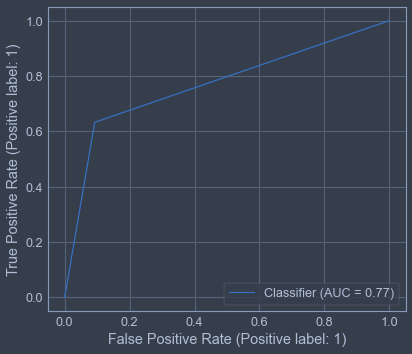

In [332]:
#plot roc_curve
RocCurveDisplay.from_predictions(y_val,y_pred)
# RocCurveDisplay.from_estimator(model,X_val,y_val)

- Threshold of 0.35 gives better Recall without much drop in Precesion

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       151
           1       0.59      0.96      0.73        49

    accuracy                           0.82       200
   macro avg       0.79      0.87      0.80       200
weighted avg       0.89      0.82      0.84       200

[[118  33]
 [  2  47]]
0.8703203135558859


C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


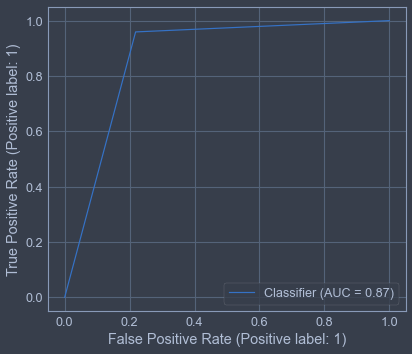

In [339]:
thresholdAdjust(model,0.35,X_val,y_val)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       602
           1       0.58      0.93      0.71       198

    accuracy                           0.81       800
   macro avg       0.77      0.85      0.79       800
weighted avg       0.87      0.81      0.83       800

[[468 134]
 [ 14 184]]
0.8533507835833417


C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


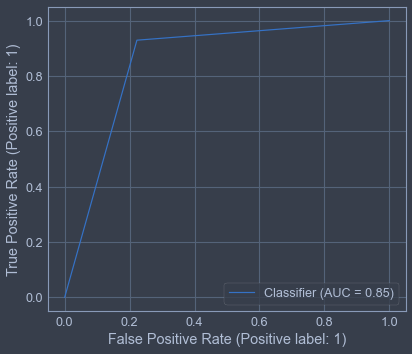

In [337]:
# changing thresod and check result- for train data
thresholdAdjust(model,0.35,X_train,y_train)


- over train & val dataset model gives fairly accurate & consistant results

# Feature selection to reduce dimenstionality of Dataset

### initial check

In [567]:
dfFeature = data.copy()

In [568]:
dfFeature = dfFeature.replace('?',np.NaN)

In [569]:
dfFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [570]:
# handle missing values

for col in dfFeature:
    if dfFeature[col].isna().sum()>0:
        print(col)
        dfFeature[col]= imputer.fit_transform(dfFeature[[col]])
# dfFeature_impute = pd.DataFrame(imputer.fit_transform(dfFeature),columns=dfFeature.columns)
# dfFeature_impute.isna().sum()

collision_type
property_damage
police_report_available


In [571]:
dfFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [587]:
num_df = dfFeature.select_dtypes(exclude='O')
cat_df = dfFeature.select_dtypes(include = 'O')

### check relationship of cat var with target

In [588]:
targetF = dfFeature['fraud_reported']
cat_df = cat_df.drop('fraud_reported',axis=1)

In [589]:
targetF = targetF.map({'Y':1,'N':0})

In [575]:
# using chi2 test for relation cecking
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [576]:
# function to for chi2 test
def chi2Parms(x,y):
    crsTab = pd.crosstab(x,y)
    chiRes = chi2_contingency(crsTab)
    chi2Stat = chiRes[0]
    pValue = chiRes[1]
    return chi2Stat,pValue

def chi2Test(df,y):
    catSelected = []
    chi2results = pd.DataFrame(columns=['feature','chi2Stat','pValue'])
    for col in df.columns:
        chi2Stat,pValue = chi2Parms(df[col],y)
        colRes = pd.DataFrame([[col,chi2Stat,pValue]], columns=['feature','chi2Stat','pValue'])
        chi2results = pd.concat([chi2results,colRes],axis=0, ignore_index=True)
        if pValue < 0.05:
            catSelected.append(col)
    return catSelected, chi2results
        

In [577]:
# chi2 for cat features
catSelected, chi2Results = chi2Test(cat_df,targetF)
print(catSelected)
chi2Results

['insured_hobbies', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state']


,feature,chi2Stat,pValue
0,policy_bind_date,969.532576,0.322635
1,policy_state,1.022879,0.599632
2,policy_csl,2.136999,0.343524
3,insured_sex,0.814982,0.366651
4,insured_education_level,1.688227,0.946027
5,insured_occupation,17.65934,0.170888
6,insured_hobbies,162.315399,0.0
7,insured_relationship,5.389248,0.370243
8,incident_date,62.747756,0.344922
9,incident_type,29.13154,0.000002


- Clearly we can observe that incident severity help to classify fraud claims

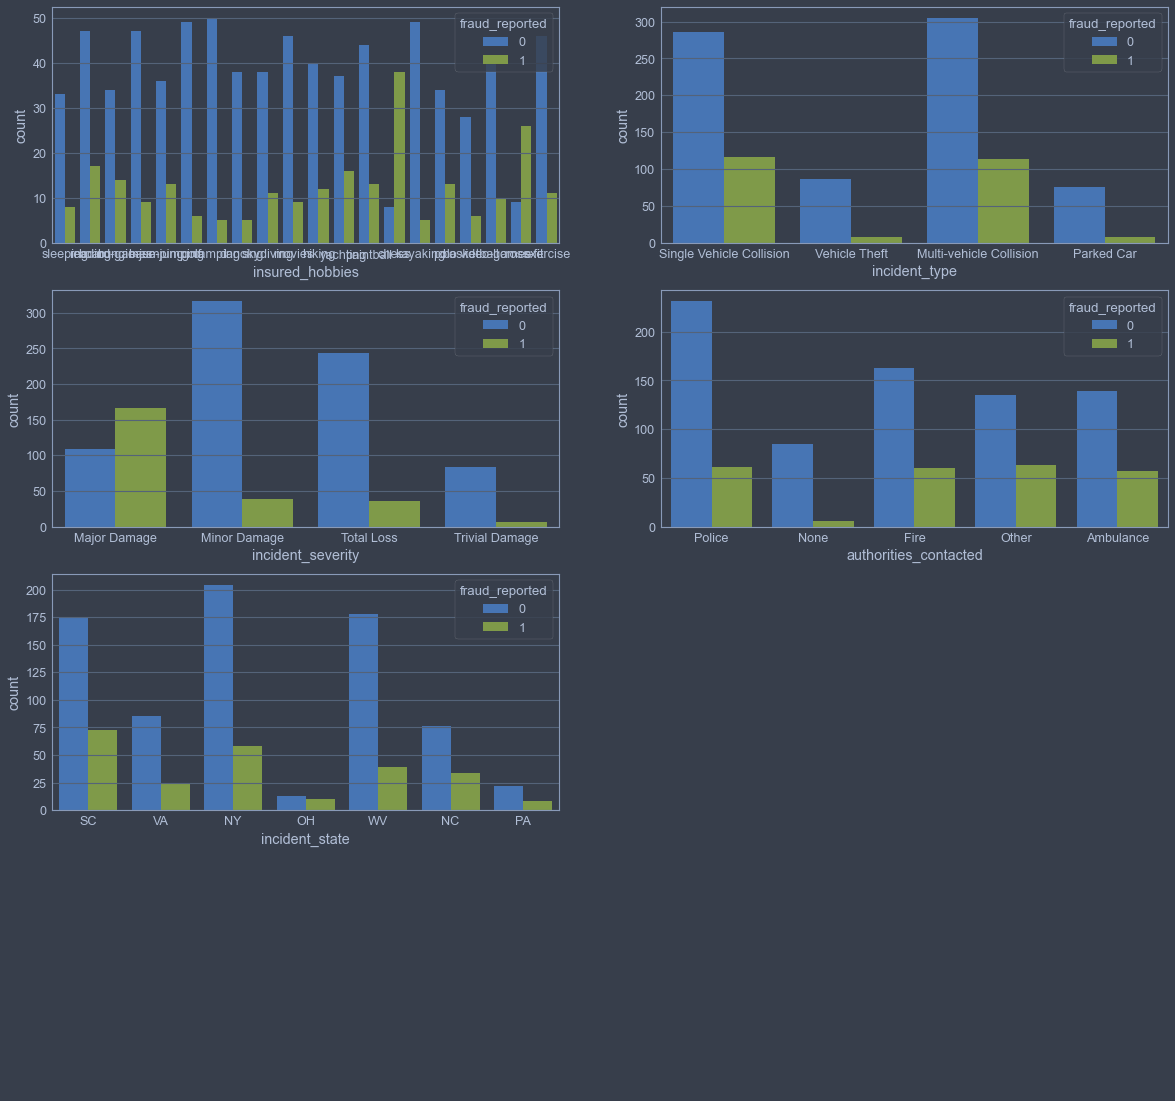

In [578]:
# subplots to confirm chi2 test results by graphs
fig, axs = plt.subplots(4,2, figsize=(20,20))
for c,col in enumerate(catSelected):
    a = sns.countplot(data=cat_df, x=cat_df[col], hue=targetF, ax=axs.flat[c])

# to hide unused plot in subplots
for i in range(len(catSelected)-len(axs.flat),0):
    axs.flat[i].axis('off')   

- its quite evdent that feature selected fro chi2 test, helps in classification fraud claims

### check numerical features for Relation

<AxesSubplot:>

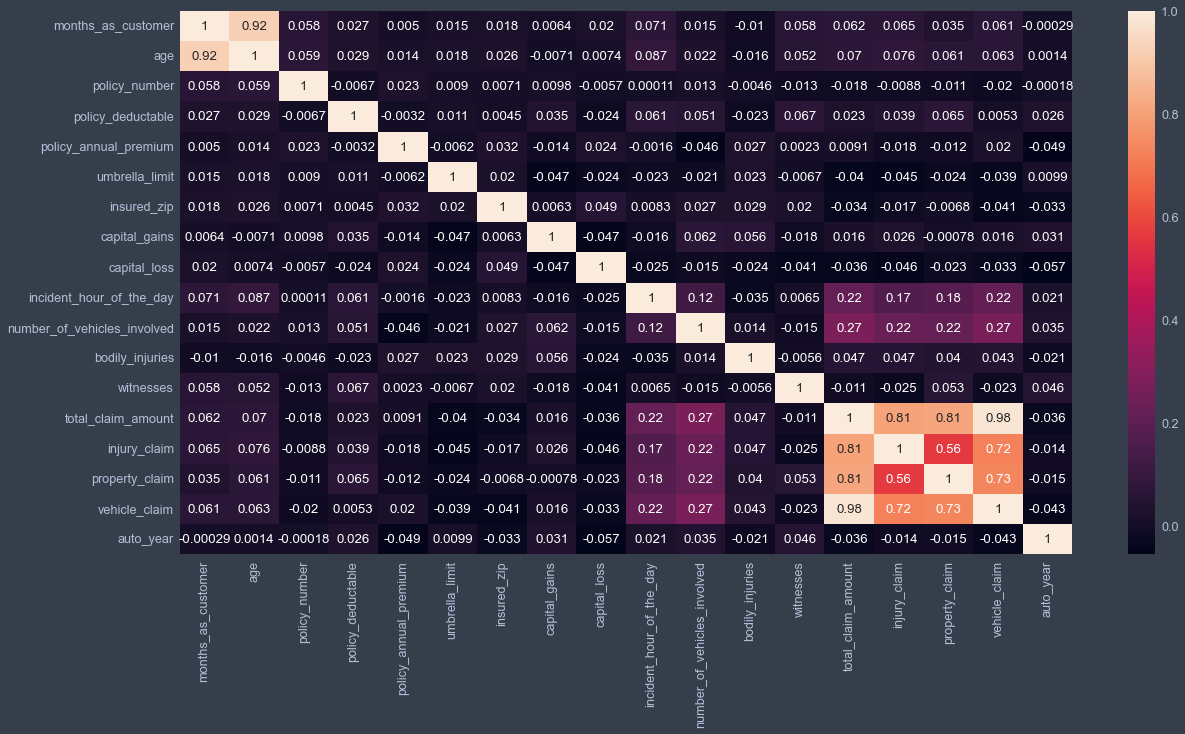

In [579]:
plt.figure(figsize=(20,10))
sns.heatmap(num_df.corr(), annot=True,)

-age & month_as_customer, total_claim_amount&vehicle_claim are highly coreleted with each other , so droping one of the pairs

In [580]:
num_df = num_df.drop(["age","total_claim_amount","vehicle_claim"], axis=1)

In [581]:
num_df.nunique()

months_as_customer              391
policy_number                  1000
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
capital_gains                   338
capital_loss                    354
incident_hour_of_the_day         24
number_of_vehicles_involved       4
bodily_injuries                   3
witnesses                         4
injury_claim                    638
property_claim                  626
auto_year                        21
dtype: int64

In [582]:
# identify descrete features
desc_df = data[num_df.nunique()[num_df.nunique()<30].index]
non_des_df = num_df.drop(desc_df.columns, axis=1)

In [583]:
non_des_df.head()

,months_as_customer,policy_number,policy_annual_premium,insured_zip,capital_gains,capital_loss,injury_claim,property_claim
0,328,521585,1406.91,466132,53300,0,6510,13020
1,228,342868,1197.22,468176,0,0,780,780
2,134,687698,1413.14,430632,35100,0,7700,3850
3,256,227811,1415.74,608117,48900,-62400,6340,6340
4,228,367455,1583.91,610706,66000,-46000,1300,650


In [590]:
# checking continuous var relation with taget var
import statsmodels.api as sm
model = sm.Logit(targetF,non_des_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.551673
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:                 0.01313
Time:                        00:22:30   Log-Likelihood:                -551.67
converged:                       True   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                   0.04025
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
months_as_customer     8.799e-05      0.001      0.139      0.889      -0.001       0.001
policy_number         -4.115e-07   2.84e-07     -1.449      0.147   -9.68e-07    1.45e-07
policy_annual_premium    -0.0005      0.000     -2.039      0.041      -0.001   -2.05e-05
insured_zip             -1.3e-06   7.05e-07     -1.845      0.065   -2.68e-06    8.12e-08
capital_gains         -2.313e-06   2.67e-06     -0.868      0.386   -7.54e-06    2.91e-06
capital_loss           -1.48e-07   2.61e-06     -0.057      0.955   -5.26e-06    4.96e-06
injury_claim           6.347e-06    1.8e-05      0.352      0.725    -2.9e-05    4.17e-05
property_claim          5.47e-05   1.78e-05      3.065      0.002    1.97e-05    8.97e-05
=========================================================================================
"""

- drop features with Pvalue > 0.05, as target var do not show much dependence on these
- months_as_customer,policy_number,capital-gains,capital-loss,injury_claim,insured_zip

In [591]:
non_des_df = non_des_df.drop(['months_as_customer','policy_number','insured_zip',
                              'capital_gains','capital_loss','injury_claim'], axis=1)

In [592]:
non_des_df.columns

Index(['policy_annual_premium', 'property_claim'], dtype='object')

In [593]:
# checking with Descrete var
desc_df.columns

Index(['policy_deductable', 'umbrella_limit', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'auto_year'],
      dtype='object')

In [594]:
desc_df.nunique()

policy_deductable               3
umbrella_limit                 11
incident_hour_of_the_day       24
number_of_vehicles_involved     4
bodily_injuries                 3
witnesses                       4
auto_year                      21
dtype: int64

In [595]:
desc_cat_cols =['incident_hour_of_the_day','bodily_injuries', 'auto_year']

In [596]:
desc_cat_sel , chi2res = chi2Test(desc_df[desc_cat_cols],targetF)
chi2res

,feature,chi2Stat,pValue
0,incident_hour_of_the_day,31.7779,0.104851
1,bodily_injuries,1.550286,0.460638
2,auto_year,23.404101,0.269391


- as none of them have much dependence with targeF, so drop them

In [597]:
desc_df = desc_df.drop(desc_cat_cols, axis=1)
desc_df.head()

,policy_deductable,umbrella_limit,number_of_vehicles_involved,witnesses
0,1000,0,1,2
1,2000,5000000,1,0
2,2000,5000000,3,3
3,2000,6000000,1,2
4,1000,6000000,1,1


In [ ]:
# features = ['insured_hobbies','incident_type','incident_severity','authorities_contacted',
#             'incident_state','policy_annual_premium','property_claim','policy_deductable', 
#             'umbrella_limit','number_of_vehicles_involved', 'bodily_injuries', 'witnesses']

In [606]:
features = ['insured_hobbies', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'property_damage','umbrella_limit',
           'policy_deductable','number_of_vehicles_involved','witnesses',
            'policy_annual_premium','property_claim']

# Model performance with new Feature set

In [607]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [616]:
df = data.copy()

In [617]:
df = df[features]
df.head()

,insured_hobbies,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,umbrella_limit,policy_deductable,number_of_vehicles_involved,witnesses,policy_annual_premium,property_claim
0,sleeping,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,YES,0,1000,1,2,1406.91,13020
1,reading,Vehicle Theft,?,Minor Damage,Police,VA,?,5000000,2000,1,0,1197.22,780
2,board-games,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,NO,5000000,2000,3,3,1413.14,3850
3,board-games,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,?,6000000,2000,1,2,1415.74,6340
4,board-games,Vehicle Theft,?,Minor Damage,None,NY,NO,6000000,1000,1,1,1583.91,650


In [618]:
df = df.replace('?',np.NaN)

In [619]:
# Map ordinal features
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})

In [620]:
df.head()

,insured_hobbies,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,umbrella_limit,policy_deductable,number_of_vehicles_involved,witnesses,policy_annual_premium,property_claim
0,sleeping,Single Vehicle Collision,Side Collision,3,Police,SC,YES,0,1000,1,2,1406.91,13020
1,reading,Vehicle Theft,NaN,2,Police,VA,NaN,5000000,2000,1,0,1197.22,780
2,board-games,Multi-vehicle Collision,Rear Collision,2,Police,NY,NO,5000000,2000,3,3,1413.14,3850
3,board-games,Single Vehicle Collision,Front Collision,3,Police,OH,NaN,6000000,2000,1,2,1415.74,6340
4,board-games,Vehicle Theft,NaN,2,None,NY,NO,6000000,1000,1,1,1583.91,650


In [622]:
for col in df.columns:
    if df[col].isna().sum()>0:
        df[col]=imputer(df[col])

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   incident_severity                       1000 non-null   int64  
 1   umbrella_limit                          1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   number_of_vehicles_involved             1000 non-null   int64  
 4   witnesses                               1000 non-null   int64  
 5   policy_annual_premium                   1000 non-null   float64
 6   property_claim                          1000 non-null   int64  
 7   insured_hobbies_basketball              1000 non-null   uint8  
 8   insured_hobbies_board-games             1000 non-null   uint8  
 9   insured_hobbies_bungie-jumping          1000 non-null   uint8  
 10  insured_hobbies_camping                 1000 non-null   uint8

In [624]:
# Encode Categorical data
df = pd.get_dummies(df,drop_first=True)
pd.set_option("display.max_columns",None)
df.shape

(1000, 42)

In [625]:
Xt,Xv,yt,yv = train_test_split(df,y,test_size=0.2, random_state=2)

In [626]:
modelN,gridN = modelTrain(est=clfXGB,para_grid=param_grid,X=Xt,Y=yt)

C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       151
           1       0.69      0.90      0.78        49

    accuracy                           0.88       200
   macro avg       0.83      0.88      0.85       200
weighted avg       0.90      0.88      0.88       200

[[131  20]
 [  5  44]]
0.8827544262738208


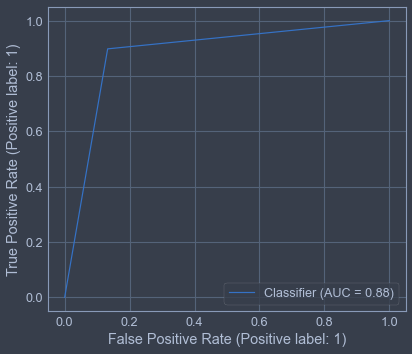

In [627]:
thresholdAdjust(modelN,0.35,Xv,yv)

C:\Users\jadha\anaconda3\envs\InsuranceFraudDetection\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       0.96      0.85      0.90       602
           1       0.66      0.89      0.76       198

    accuracy                           0.86       800
   macro avg       0.81      0.87      0.83       800
weighted avg       0.88      0.86      0.86       800

[[510  92]
 [ 22 176]]
0.868032484311554


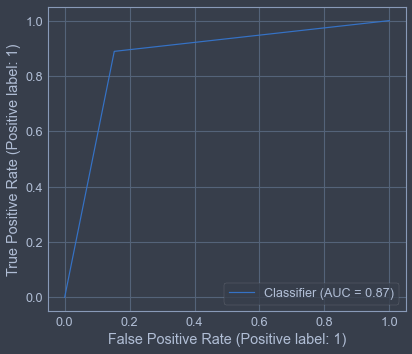

In [628]:
thresholdAdjust(modelN,0.35,Xt,yt)

# Conclusion :
- model with XGBClassifier gives Roc_curve_score of 88% & recall of 90%
- XGB with optimised feature list gives same ouput as with all features
